# Final Project: John Tsiglieris - AI, ML, and Data Science Salaries
    - Comp 122 - Spring 2023 
    
    

## Table of Contents
<ul>
<li><a href="#intro">I. Introduction</a></li>
<li><a href="#wrangling">II. Data Wrangling</a></li>
<li><a href="#eda">III. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">IV. Conclusions</a></li>
</ul>

----
<a id='intro'></a>
## I. INTRODUCTION
For this project I will be analyzing a dataset of various salaries from a csv file of jobs in the fields of AI, Machine Learning, and Data Science. Here is the link to the dataset: https://www.kaggle.com/datasets/nguyenthicamlai/ai-ml-data-salaries
In my studies of the dataset I came up with several questions...
1) What is the diversity of job titles in each field?
2) How do salaries change as you gain experience in each field?
3) What is the average salary per field?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import string
import numpy as np

In [4]:
#load dataset
file = open("salaries.csv")
df = pd.read_csv(file)

<b>Explore the Dataset:</b> Use various Pandas functions to explore the dataset, including:<br>

<b>head()</b> and <b>tail()</b> functions to view the first and last few rows of the dataset.<br>

<b>info()</b> function to get information about the data types of each column and the number of non-null values in each column.<br>

<b>describe()</b> function to get a summary of the dataset's statistical measures such as mean, standard deviation, minimum and maximum values, etc.<br>

<b>value_counts()</b> function to get the frequency of each unique value in a particular column.<br>

In [6]:
#initial viewing of data
print(df)

      work_year experience_level employment_type                 job_title  \
0          2023               MI              FT        AWS Data Architect   
1          2023               SE              FT            Data Scientist   
2          2023               SE              FT            Data Scientist   
3          2023               SE              FT             Data Engineer   
4          2023               SE              FT             Data Engineer   
...         ...              ...             ...                       ...   
4129       2020               SE              FT            Data Scientist   
4130       2021               MI              FT  Principal Data Scientist   
4131       2020               EN              FT            Data Scientist   
4132       2020               EN              CT     Business Data Analyst   
4133       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

Text(0.5, 1.0, 'Top salary for every job')

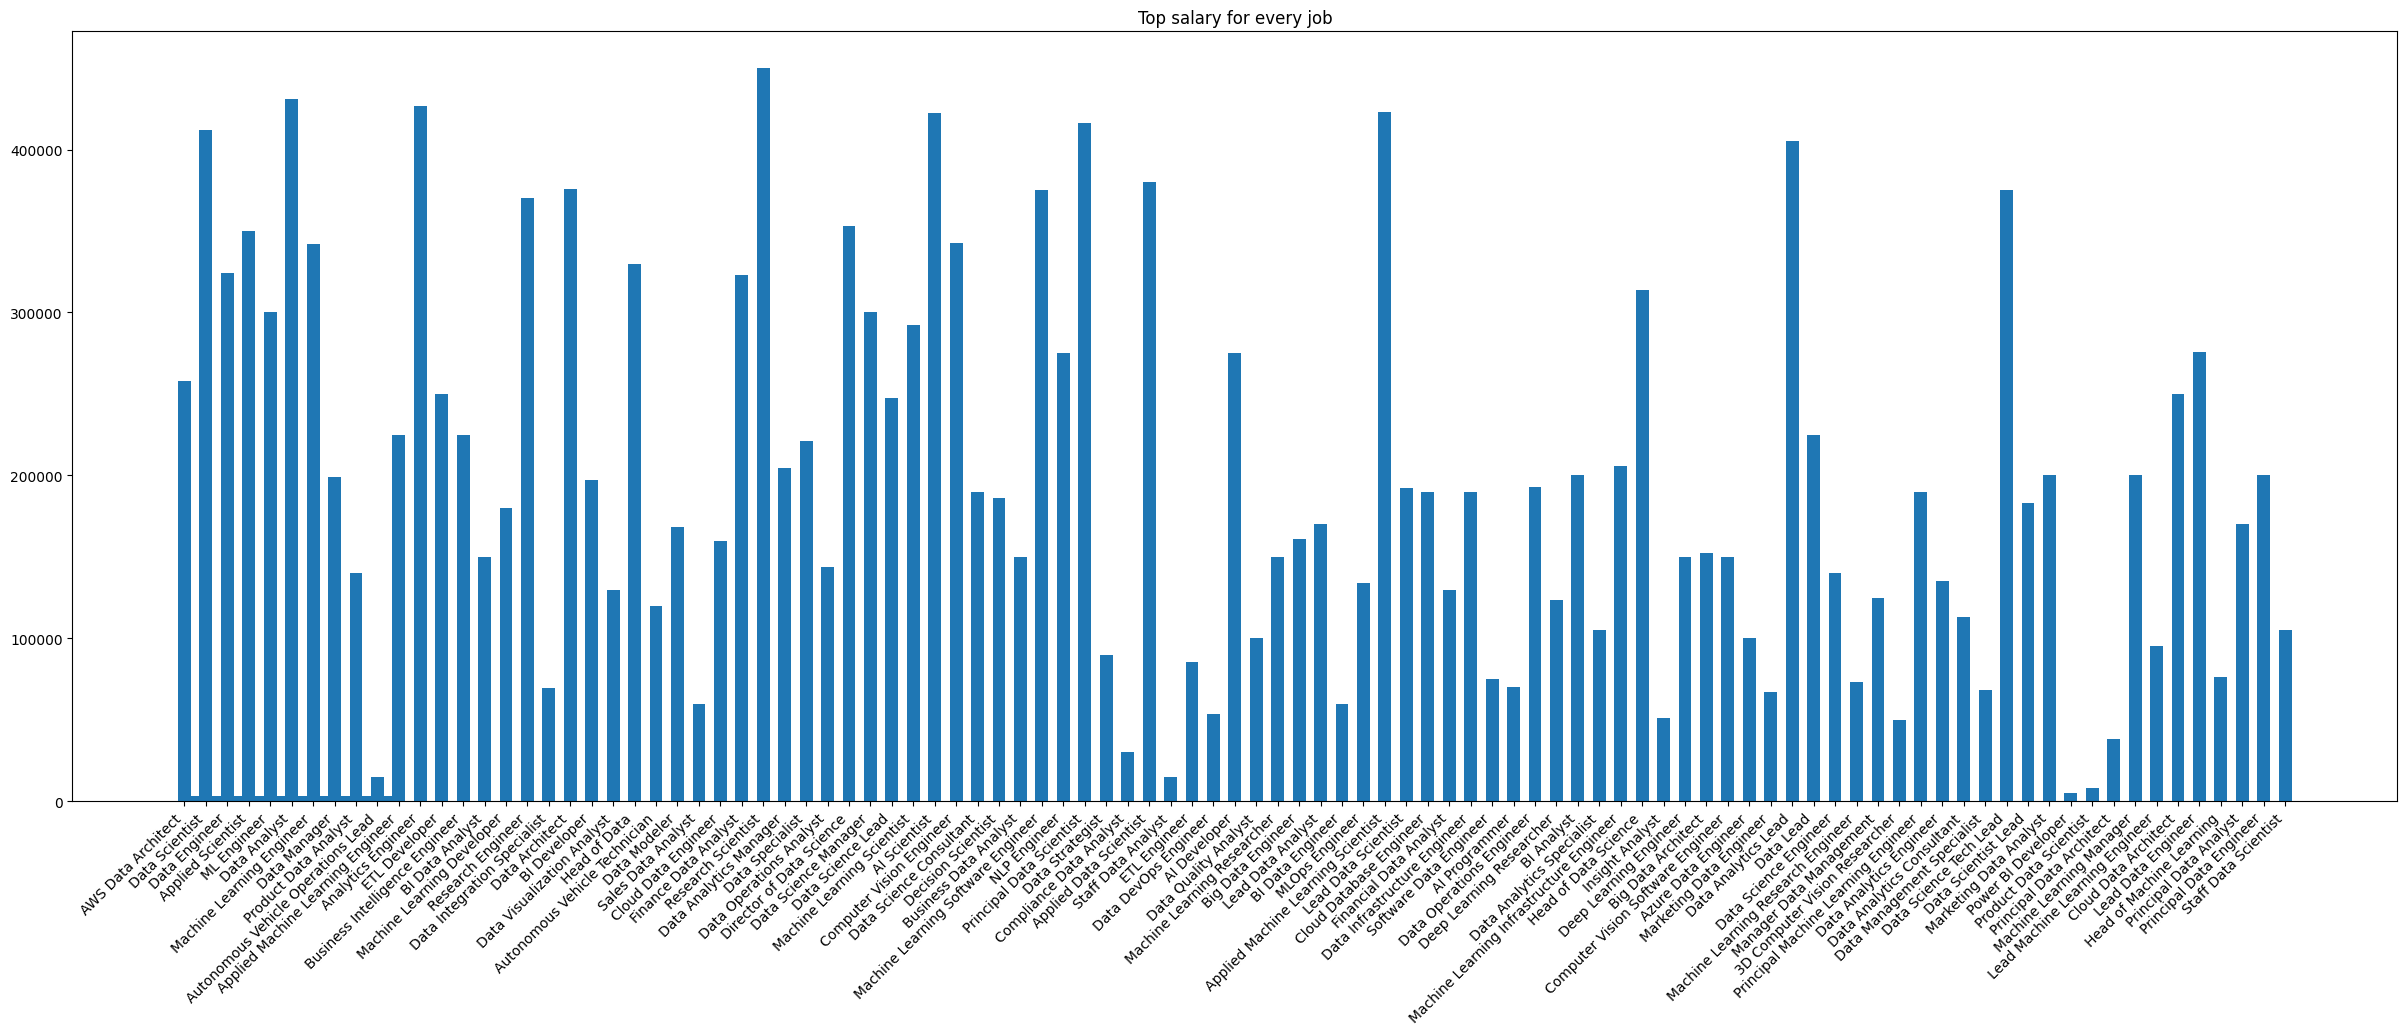

In [3]:
plt.figure(figsize=(30,10))
plt.hist(df['job_title'])
plt.xticks(rotation = 45, ha = 'right')
plt.bar(x=df.job_title, height=df.salary_in_usd, width=0.6)
plt.title('Top salary for every job')

<a id='wrangling'></a>
## Data Wrangling

<b>Clean the Dataset:</b> This step involves cleaning the dataset by handling missing or duplicate values, fixing data types, and removing irrelevant columns. <br>Some of the common data cleaning techniques include:
<br>
Dropping duplicates using <b>drop_duplicates()</b> function.<br>

Handling missing values using <b>fillna()</b> function or by removing rows with missing values using <b>dropna()</b>function.<br>

Converting data types of columns using <b>astype()</b> function.
<br>
Renaming columns using <b>rename()</b> function.<br>

Removing irrelevant columns using <b>drop()</b> function.<br>

In [11]:
df.drop_duplicates()
df.drop(columns=['salary', 'salary_currency', 'employee_residence', 'company_size'], inplace=True)
print(df)

      work_year experience_level employment_type                 job_title  \
0          2023               MI              FT        AWS Data Architect   
1          2023               SE              FT            Data Scientist   
2          2023               SE              FT            Data Scientist   
3          2023               SE              FT             Data Engineer   
4          2023               SE              FT             Data Engineer   
...         ...              ...             ...                       ...   
4129       2020               SE              FT            Data Scientist   
4130       2021               MI              FT  Principal Data Scientist   
4131       2020               EN              FT            Data Scientist   
4132       2020               EN              CT     Business Data Analyst   
4133       2021               SE              FT      Data Science Manager   

      salary_in_usd  remote_ratio company_location  
0         

<a id='eda'></a>
## Exploratory Data Analysis

<b>Analyze the Dataset:</b> Once the dataset is cleaned, it's time to perform some analysis to gain insights. This can involve creating visualizations using Matplotlib and performing statistical analysis to answer your research questions. <br>



### Research Question 1: List of all job titles per field

In [6]:
data = []
ai = []
ml = []
misc = []

for index, rows in df.iterrows():
    if (rows["job_title"].find("Data") >= 0):
        data.append(rows["job_title"])
        
    elif (rows["job_title"].find("Machine Learning") >= 0 or rows["job_title"].find("ML ") >= 0):
        ml.append(rows["job_title"])
        
    elif (rows["job_title"].find("AI") >= 0):
        ai.append(rows["job_title"])
        
    else:
        misc.append(rows["job_title"])



def columns( datalist, cols ):
    print("Length of list: " + str(len(datalist)))
    pairs = [ "\t\t".join(datalist[i:i+cols]) for i in range(0,len(datalist),cols) ]
    return "\n".join( pairs )

print(columns(ai, 3))

Length of list: 29
AI Scientist		AI Developer		AI Developer
AI Developer		AI Developer		AI Developer
AI Scientist		AI Programmer		AI Developer
AI Developer		AI Developer		AI Scientist
AI Scientist		AI Developer		AI Developer
AI Programmer		AI Scientist		AI Scientist
AI Scientist		AI Scientist		AI Scientist
AI Scientist		AI Scientist		AI Scientist
AI Scientist		AI Scientist		AI Scientist
AI Scientist		AI Scientist


### Research Question 2: Analysis of salaries per field, sorted by experience

In [10]:
#sort each field by salary using different color plots for each experience level
dataEN = []
dataSE = []
dataMI = []
dataEX = []
aiEN = []
aiMI = []
aiSE = []
aiEX = []
mlEN = []
mlMI = []
mlSE = []
mlEX = []
misc = []

for index, rows in df.iterrows():
    if (rows["job_title"].find("Data") >= 0):
        if (rows["experience_level"] == 'EN'):
            dataEN.append(rows)
        elif (rows["experience_level"] == 'MI'):
            dataMI.append(rows)
        elif (rows["experience_level"] == 'SE'):
            dataSE.append(rows)
        elif (rows["experience_level"] == 'EX'):
            dataEX.append(rows)
        
    elif (rows["job_title"].find("Machine Learning") >= 0 or rows["job_title"].find("ML ") >= 0):
        if (rows["experience_level"] == 'EN'):
            mlEN.append(rows)
        elif (rows["experience_level"] == 'MI'):
            mlMI.append(rows)
        elif (rows["experience_level"] == 'SE'):
            mlSE.append(rows)
        elif (rows["experience_level"] == 'EX'):
            mlEX.append(rows)
        
    elif (rows["job_title"].find("AI") >= 0):
        if (rows["experience_level"] == 'EN'):
            aiEN.append(rows)
        elif (rows["experience_level"] == 'MI'):
            aiMI.append(rows)
        elif (rows["experience_level"] == 'SE'):
            aiSE.append(rows)
        elif (rows["experience_level"] == 'EX'):
            aiEX.append(rows)
        
    else:
        misc.append(rows[["experience_level", "job_title","salary_in_usd"]])
        
dfDataEN = pd.DataFrame(dataEN)
dfDataMI = pd.DataFrame(dataMI)
dfDataSE = pd.DataFrame(dataSE)
dfDataEX = pd.DataFrame(dataEX)
dfAIEN = pd.DataFrame(aiEN)
dfAIMI = pd.DataFrame(aiMI)
dfAISE = pd.DataFrame(aiSE)
dfAIEX = pd.DataFrame(aiEX)
dfMLEN = pd.DataFrame(mlEN)
dfMLMI = pd.DataFrame(mlMI)
dfMLSE = pd.DataFrame(mlSE)
dfMLEX = pd.DataFrame(mlEX)
dfMisc = pd.DataFrame(misc)

#just for debugging
# print(len(dfDataEN.index))
# print(len(dfDataMI.index))
# print(len(dfDataSE.index))
# print(len(dfDataEX.index))
#print(len(dfAI.index))
#print(len(dfML.index))  
#print(len(dfMisc.index))

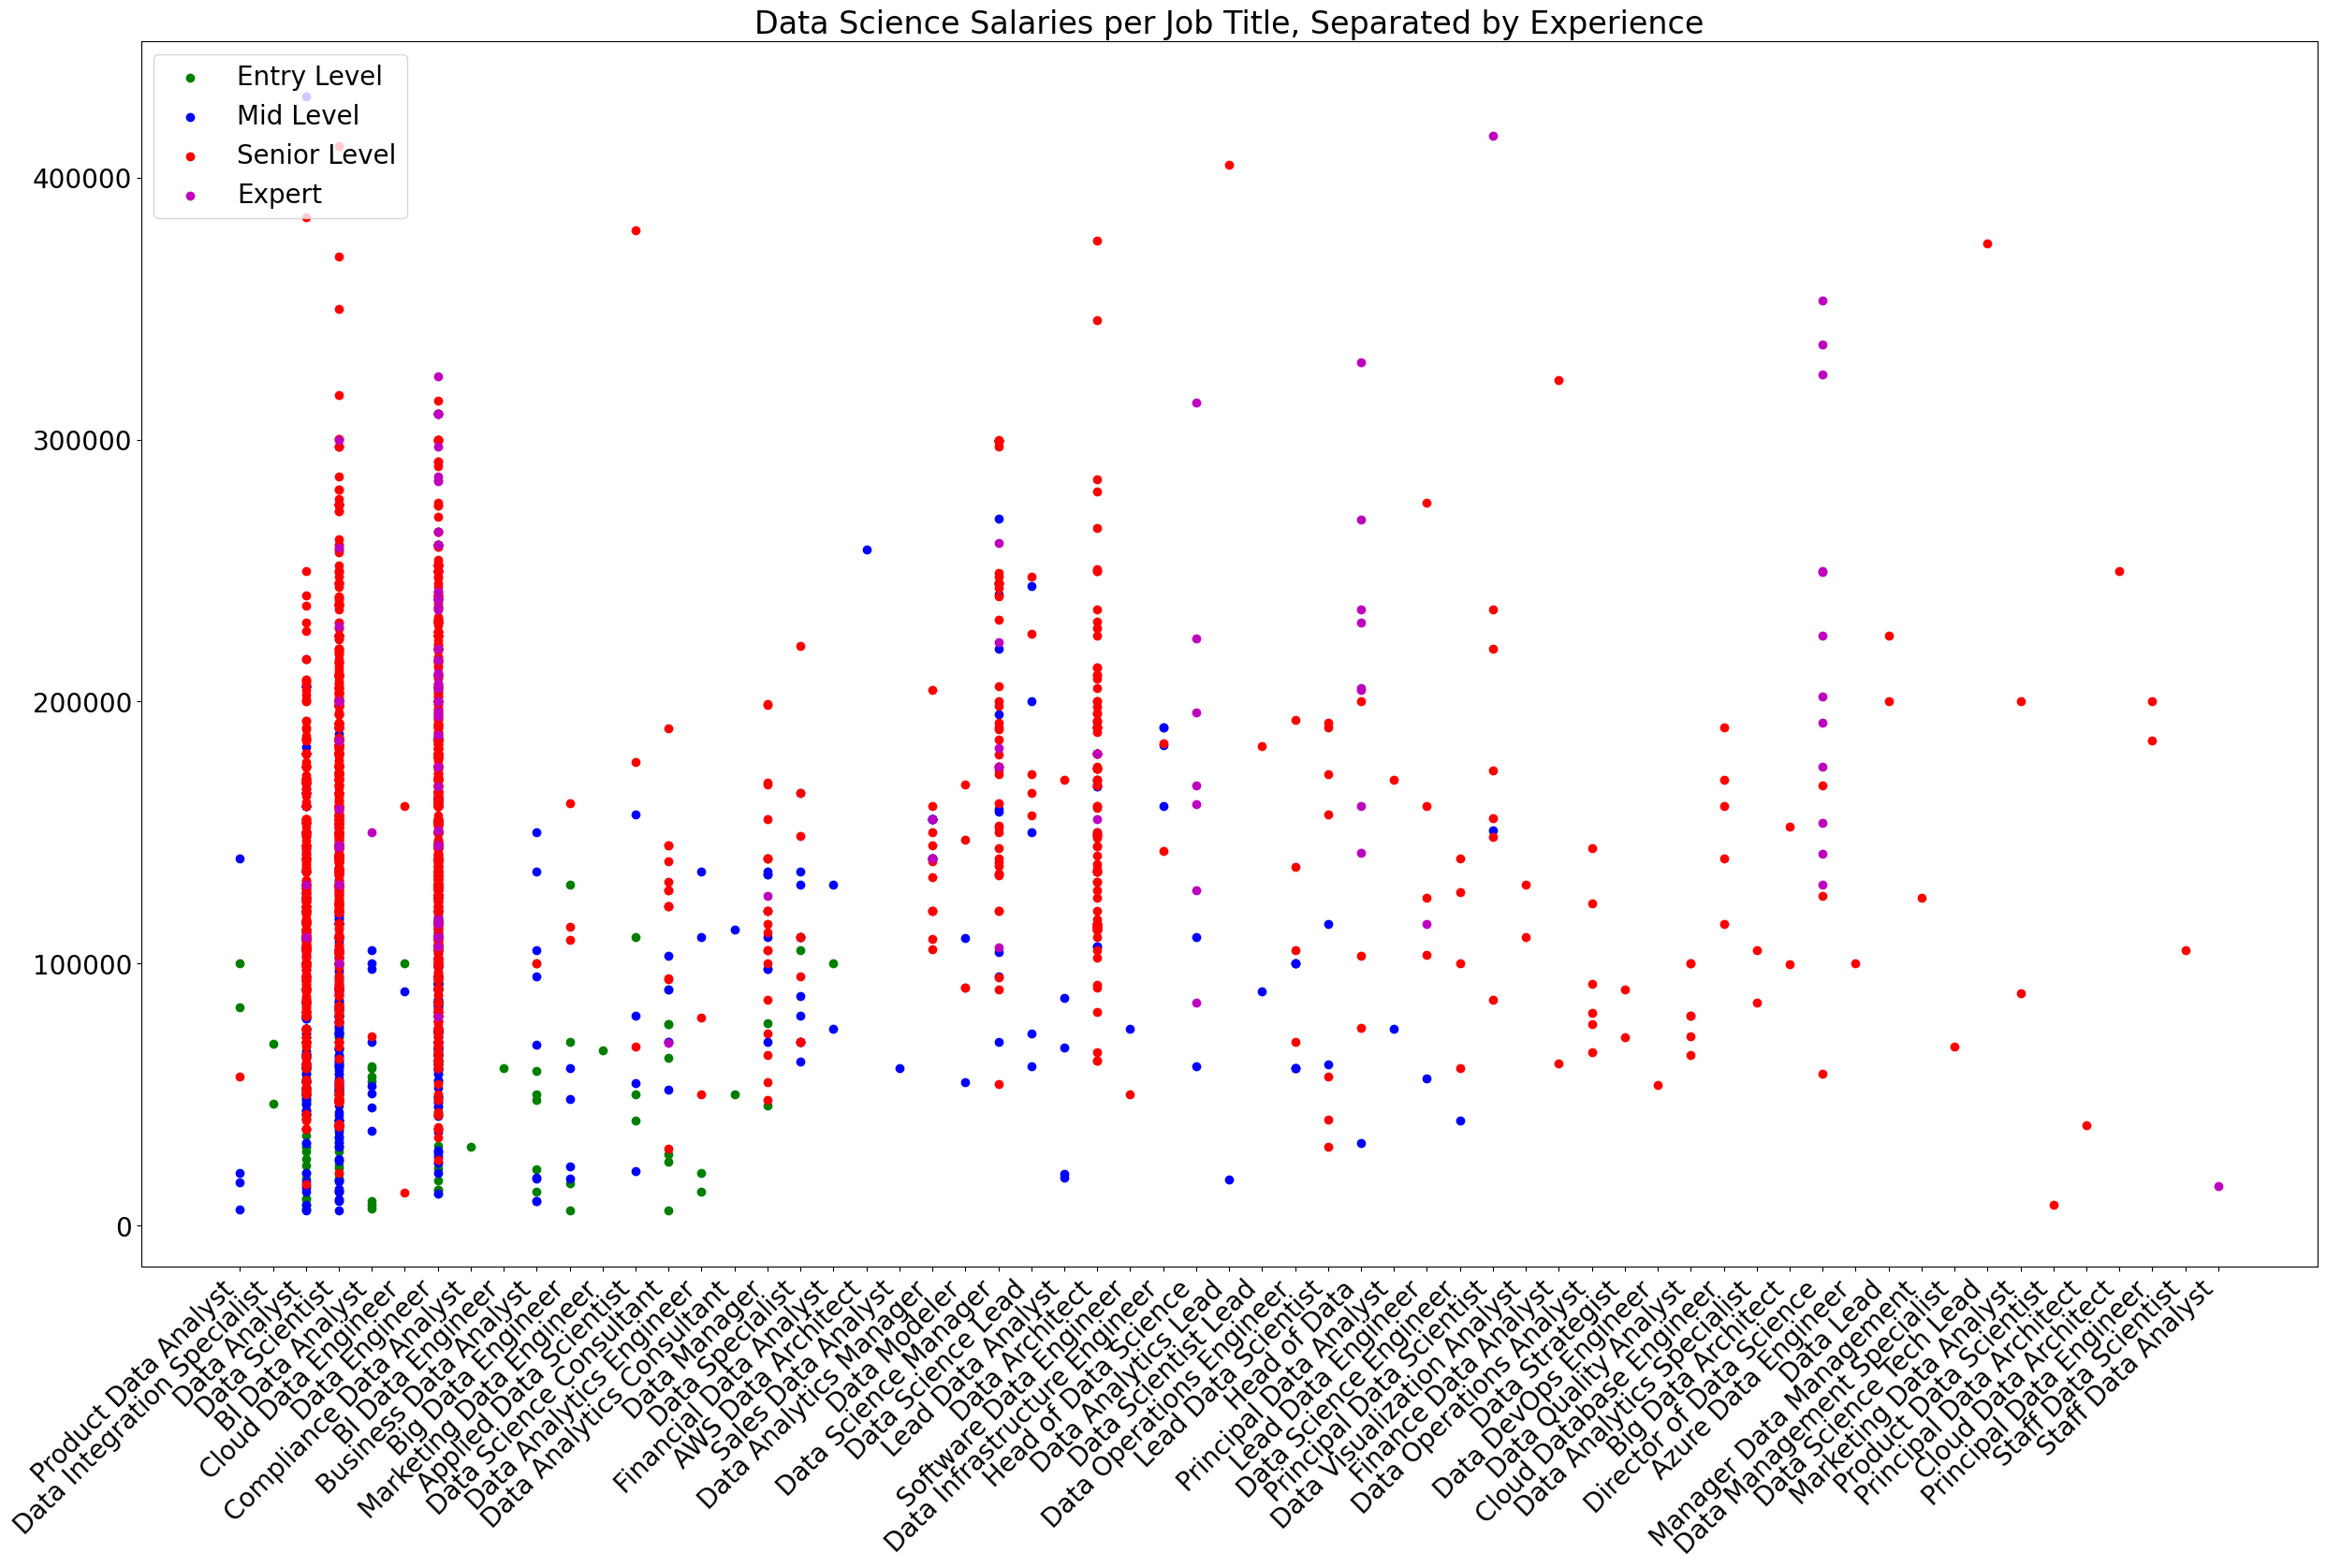

In [11]:
plt.figure(figsize=(30,17))
plt.xticks(rotation = 45, ha = 'right')
rc('font', **{'size': 20})
plt.scatter(x=dfDataEN.job_title, y=dfDataEN.salary_in_usd, linewidths=1, color='g', label="Entry Level")
plt.scatter(x=dfDataMI.job_title, y=dfDataMI.salary_in_usd, linewidths=1, color='b', label="Mid Level")
plt.scatter(x=dfDataSE.job_title, y=dfDataSE.salary_in_usd, linewidths=1, color='r', label="Senior Level")
plt.scatter(x=dfDataEX.job_title, y=dfDataEX.salary_in_usd, linewidths=1, color='m', label="Expert")
plt.title('Data Science Salaries per Job Title, Separated by Experience')
plt.legend(loc="upper left")

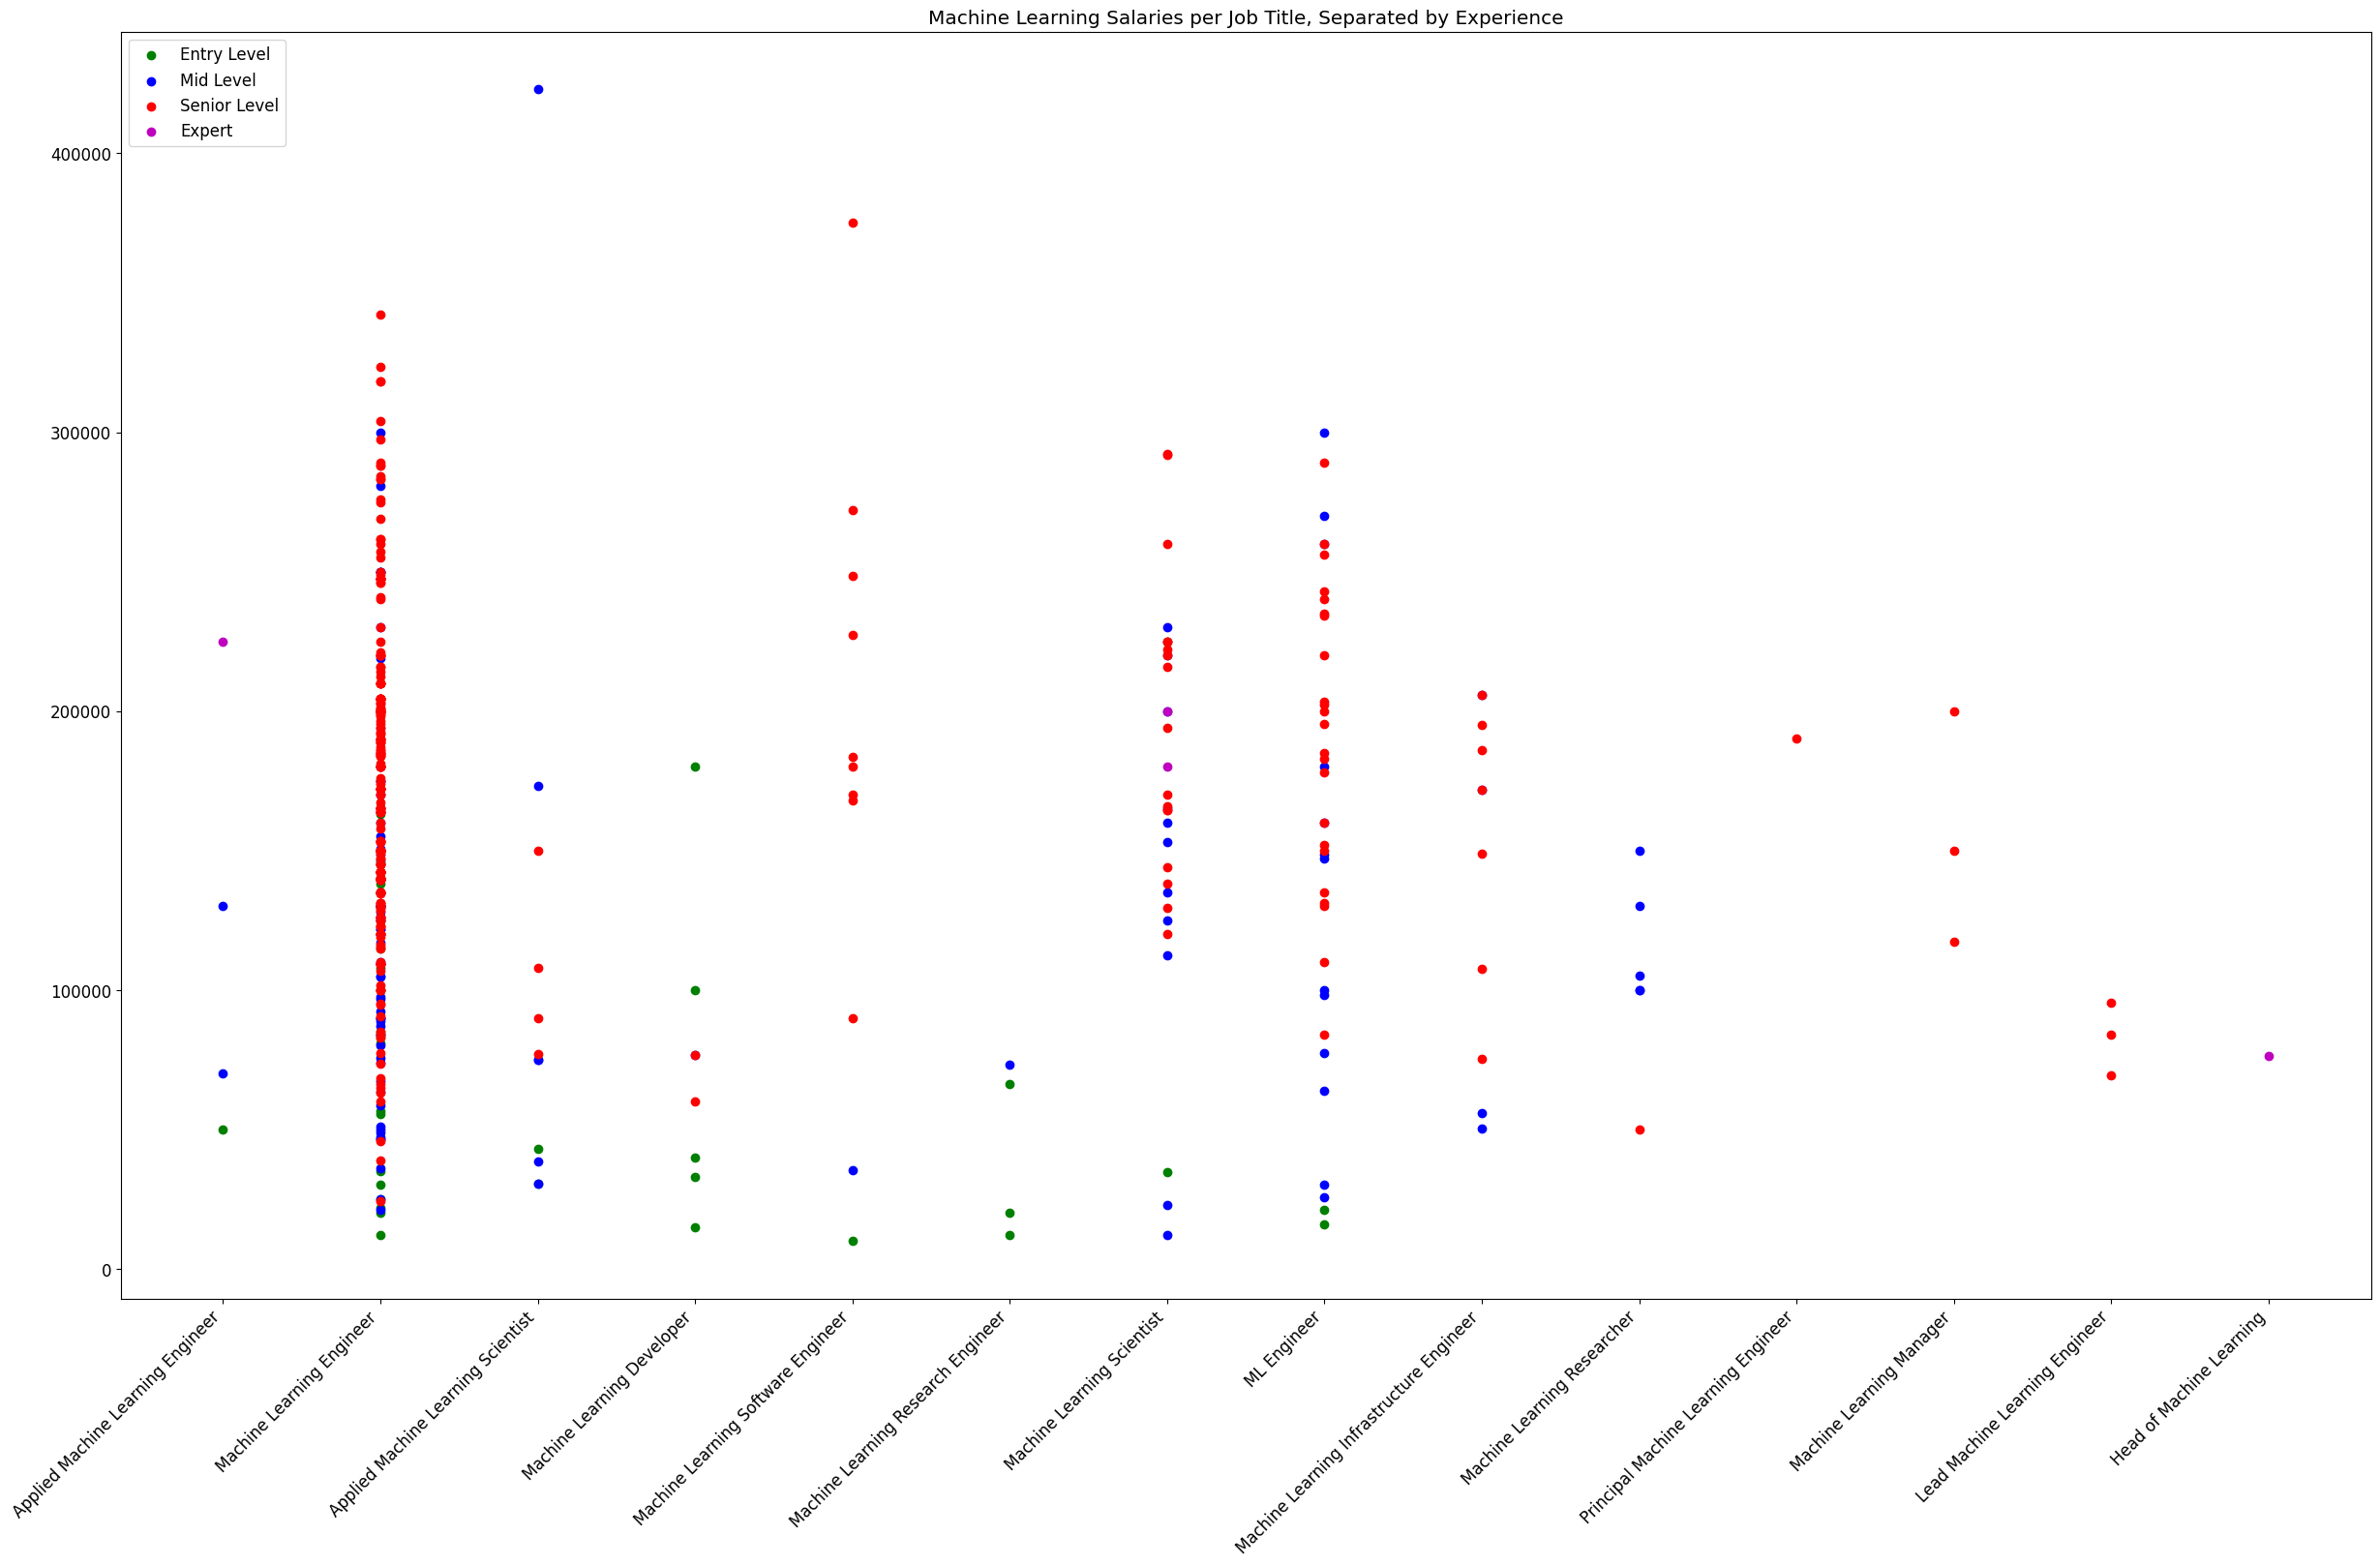

In [13]:
plt.figure(figsize=(30,17))
plt.xticks(rotation = 45, ha = 'right')
rc('font', **{'size': 12})
plt.scatter(x=dfMLEN.job_title, y=dfMLEN.salary_in_usd, linewidths=1, color='g', label="Entry Level")
plt.scatter(x=dfMLMI.job_title, y=dfMLMI.salary_in_usd, linewidths=1, color='b', label="Mid Level")
plt.scatter(x=dfMLSE.job_title, y=dfMLSE.salary_in_usd, linewidths=1, color='r', label="Senior Level")
plt.scatter(x=dfMLEX.job_title, y=dfMLEX.salary_in_usd, linewidths=1, color='m', label="Expert")
plt.title('Machine Learning Salaries per Job Title, Separated by Experience')
plt.legend(loc="upper left")

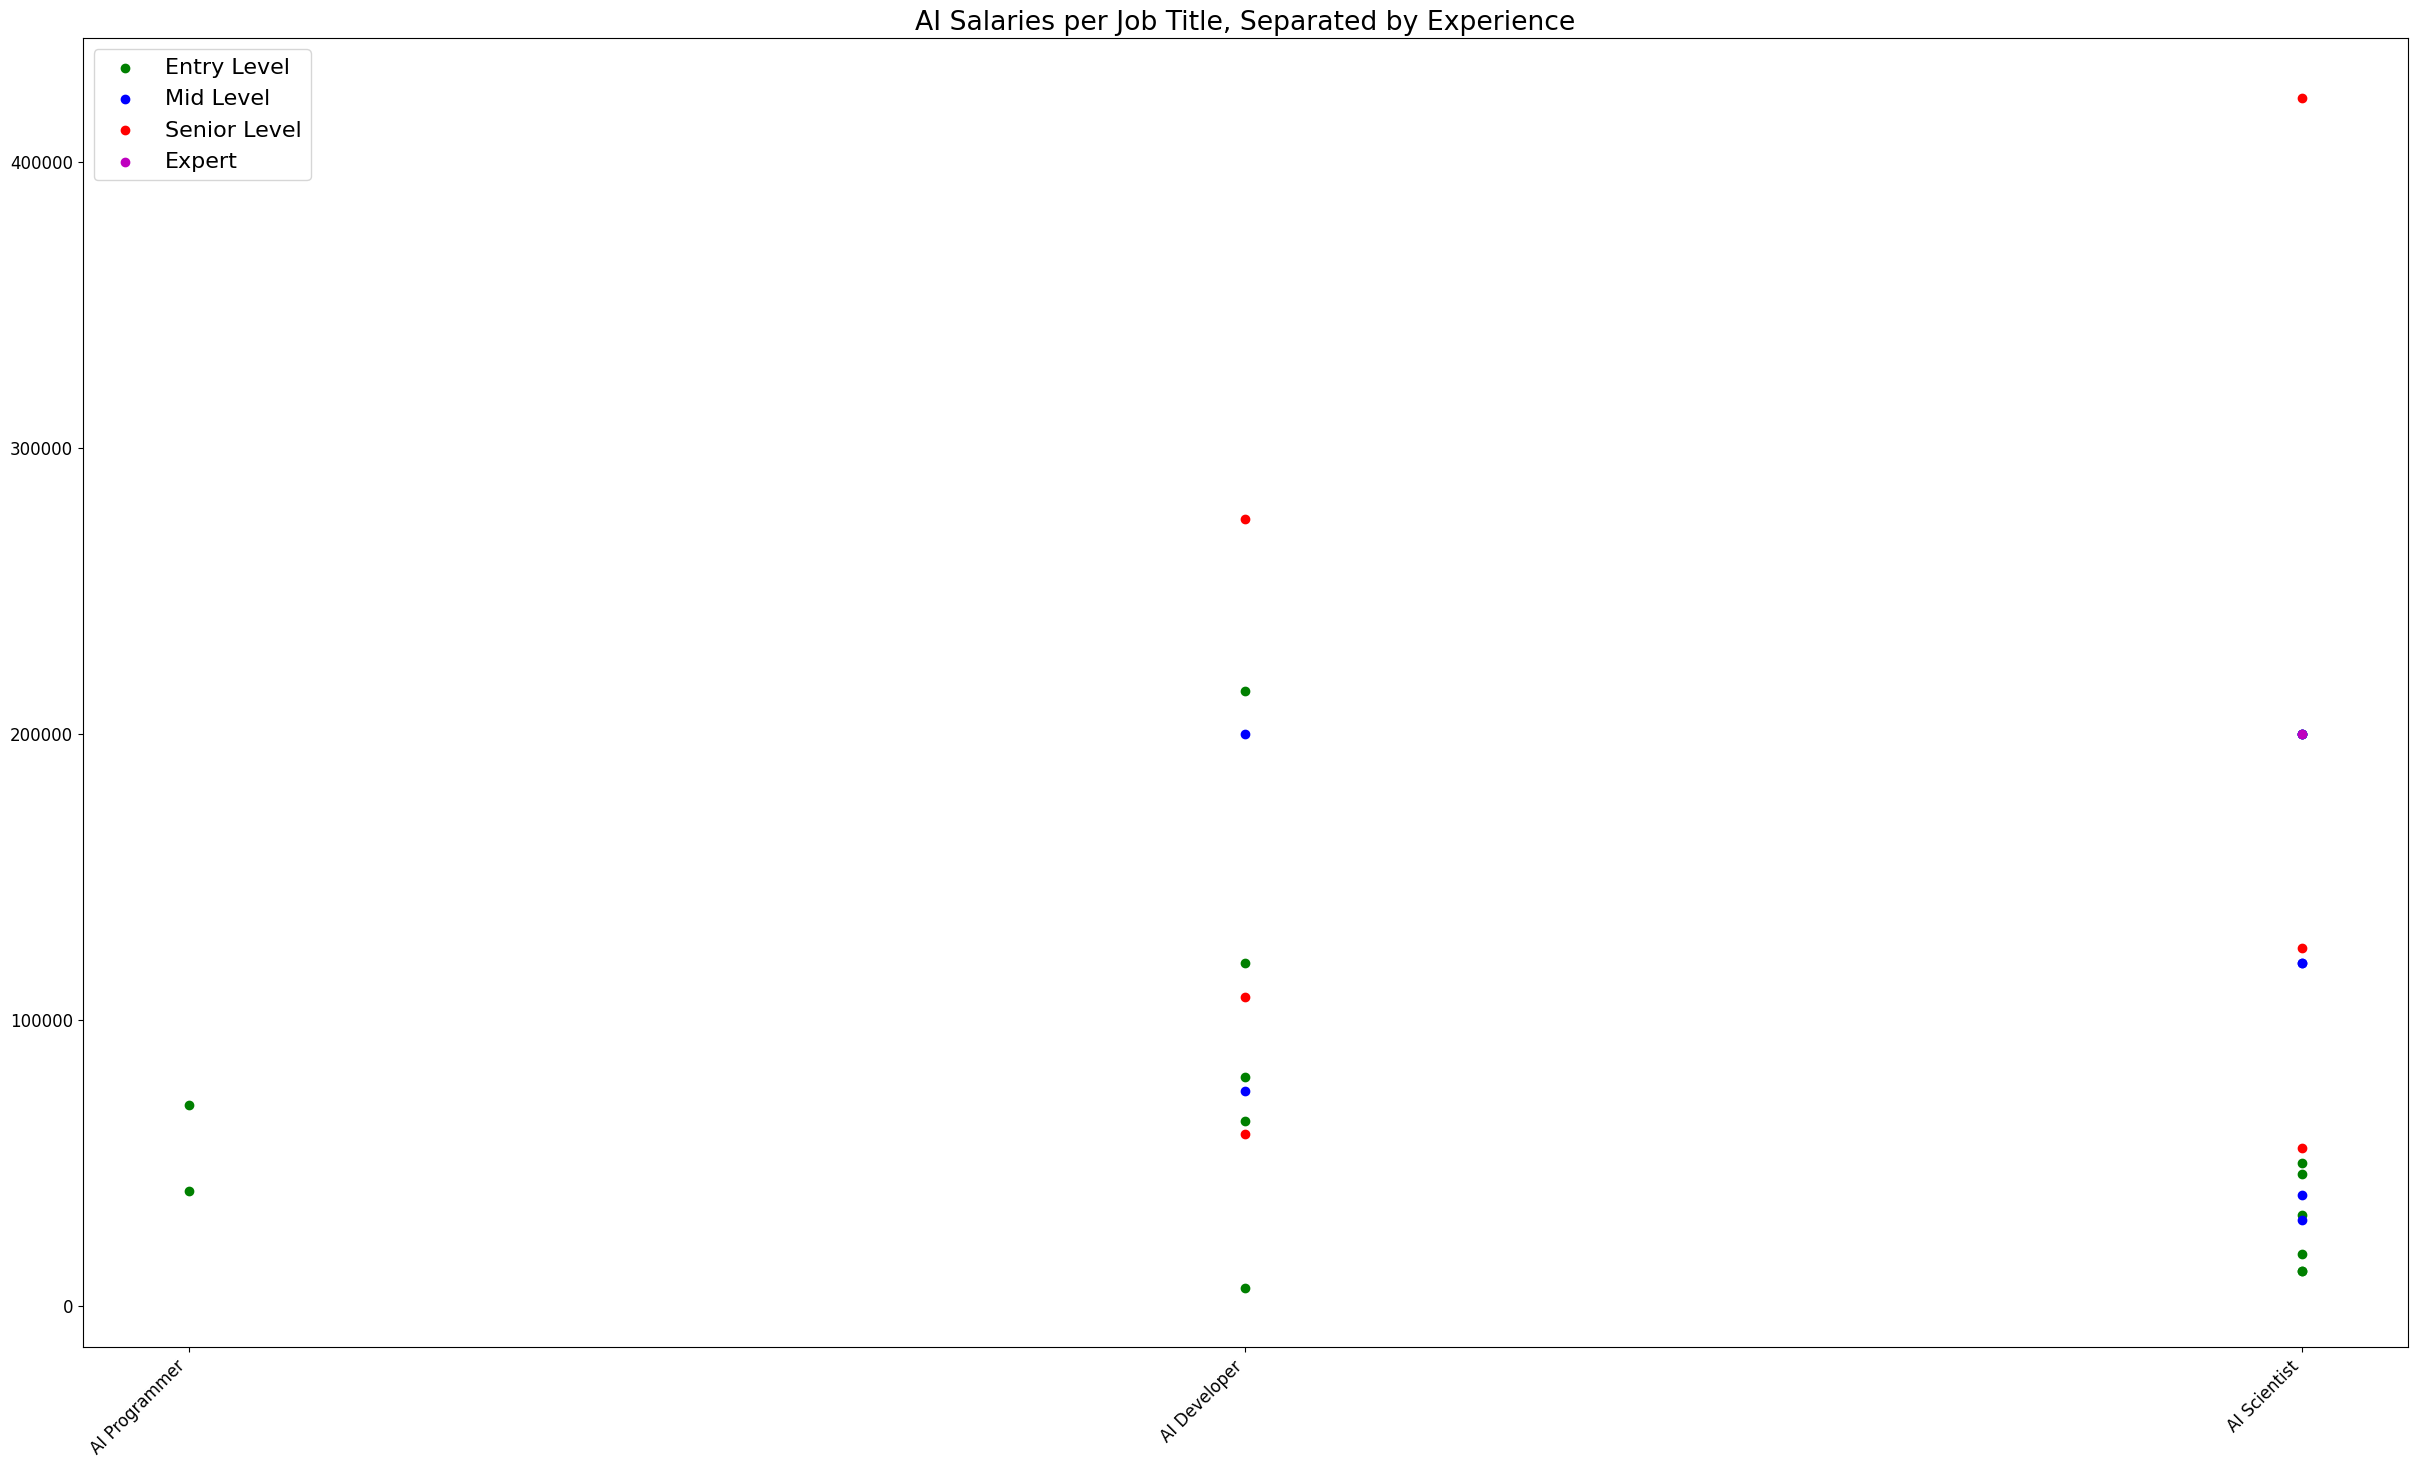

In [16]:
plt.figure(figsize=(30,17))
plt.xticks(rotation = 45, ha = 'right')
rc('font', **{'size': 16})
plt.scatter(x=dfAIEN.job_title, y=dfAIEN.salary_in_usd, linewidths=1, color='g', label="Entry Level")
plt.scatter(x=dfAIMI.job_title, y=dfAIMI.salary_in_usd, linewidths=1, color='b', label="Mid Level")
plt.scatter(x=dfAISE.job_title, y=dfAISE.salary_in_usd, linewidths=1, color='r', label="Senior Level")
plt.scatter(x=dfAIEX.job_title, y=dfAIEX.salary_in_usd, linewidths=1, color='m', label="Expert")
plt.title('AI Salaries per Job Title, Separated by Experience')
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Miscallaneous Salaries per Job Title')

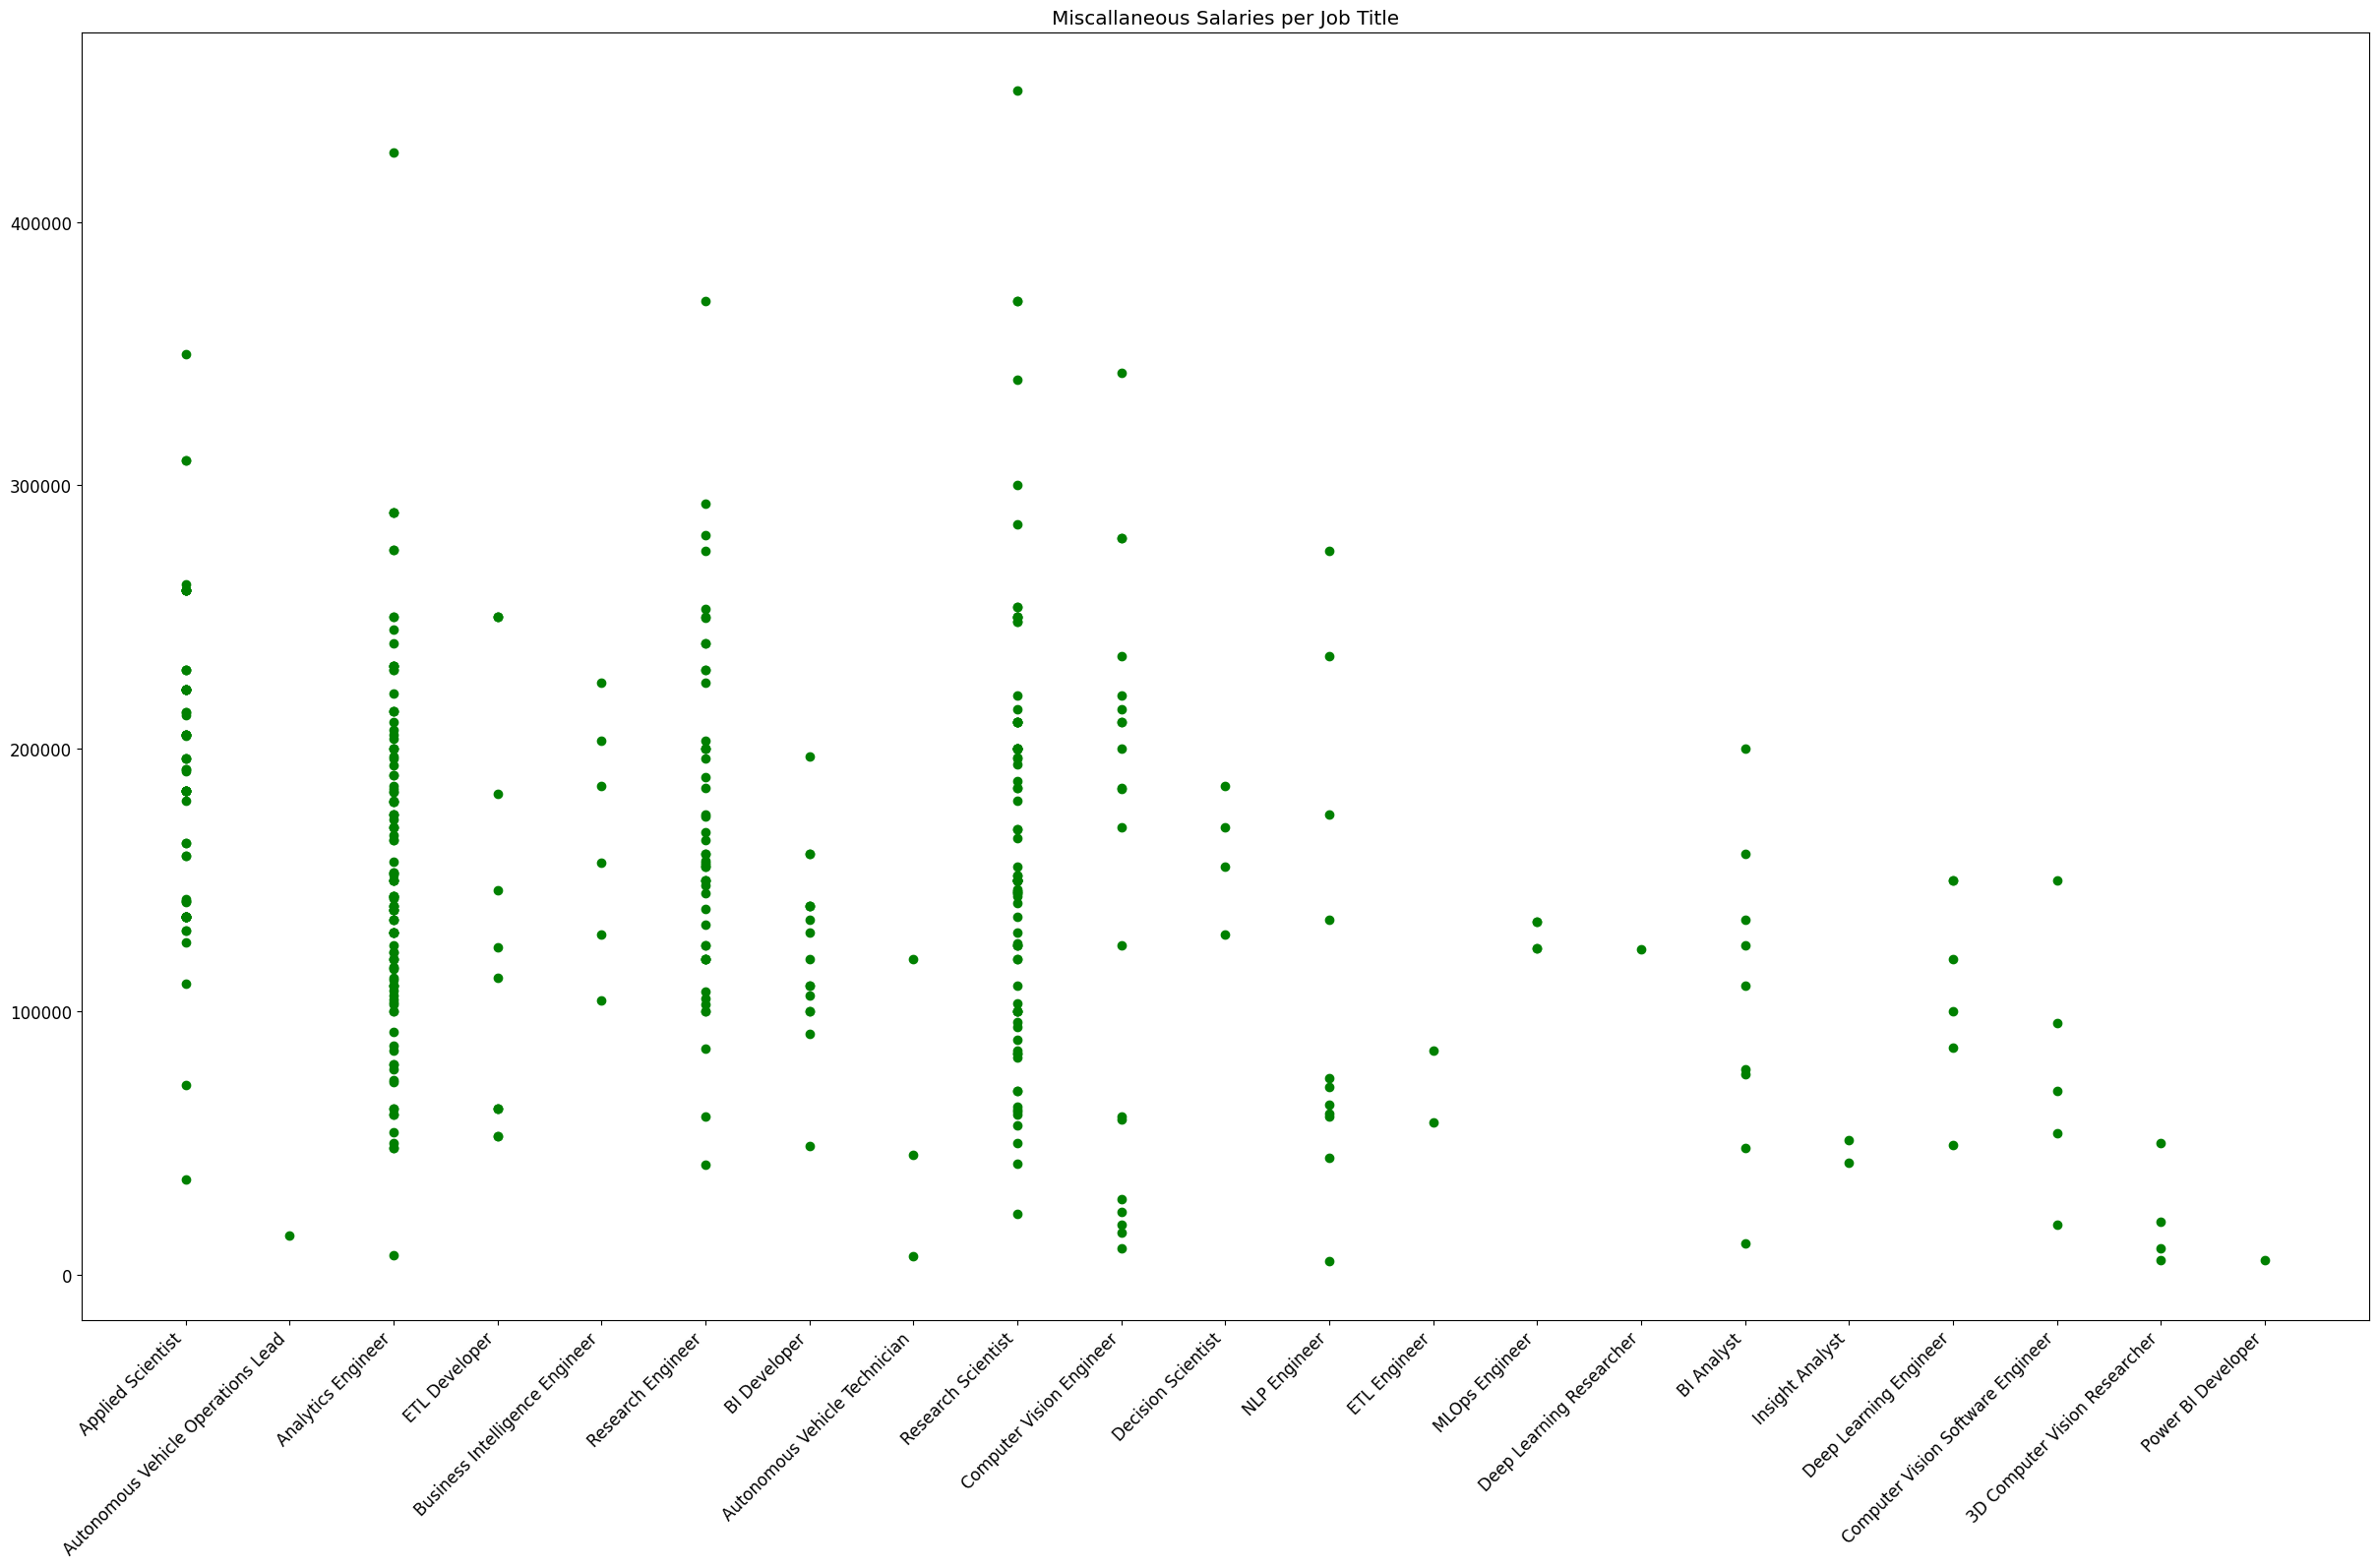

In [15]:
plt.figure(figsize=(30,17))
plt.xticks(rotation = 45, ha = 'right')
rc('font', **{'size': 12})
plt.scatter(x=dfMisc.job_title, y=dfMisc.salary_in_usd, linewidths=1, color='g')
plt.title('Miscallaneous Salaries per Job Title')

### Research Question 3: Average Salaries per Field

In [18]:
#average salaries
data = []
ai = []
ml = []
misc = []

sumdata = 0
sumai = 0
summl = 0
summisc = 0
for index, rows in df.iterrows():
    if (rows["job_title"].find("Data") >= 0):
        data.append(rows["salary_in_usd"])
        sumdata = sumdata + rows["salary_in_usd"]
        
    elif (rows["job_title"].find("Machine") >= 0 or rows["job_title"].find("ML") >= 0):
        ml.append(rows["salary_in_usd"])
        summl = summl + rows["salary_in_usd"]
        
    elif (rows["job_title"].find("AI") >= 0):
        ai.append(rows["salary_in_usd"])
        sumai = sumai + rows["salary_in_usd"]
        
    else:
        misc.append(rows["salary_in_usd"])
        summisc = summisc + rows["salary_in_usd"]
        
print("Average data science salary:  $" + str('{0:.8g}'.format(sumdata/len(data))))
print("Average AI salary:  $" + str('{0:.8g}'.format(sumai/len(ai))))
print("Average machine learning salary:  $" + str('{0:.8g}'.format(summl/len(ml))))
print("Average miscellaneous salary:  $" + str('{0:.8g}'.format(summisc/len(misc))))

Average data science salary:  $135224.67
Average AI salary:  $110165.1
Average machine learning salary:  $154518.54
Average miscellaneous salary:  $156003.05


<a id='conclusions'></a>
## Conclusions

Draw Conclusion: Finally, summarize your findings and draw conclusions based on your analysis.

-Data Science for job security and job progression. 
-Machine Learning has best salaries.
-Machine Learning is not friendly for entry level programmers, given low quantity of entry level jobs.
-Best paying job: Research Scientist or analytics engineer
-AI has the least diversity of job roles, despite recent progressions in AI. Throughout history the loss of jobs to new technology usually creates a new industry, is that the case for AI?